# K means Clustering on Mall_Customers 

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [112]:
df = pd.read_csv("Mall_Customers.csv",index_col='CustomerID')
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [113]:
df.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [114]:
df.isnull().sum() # .sum counts how many true values.
df.drop_duplicates(inplace=True)

In [143]:
X = df.iloc[:,[2,3]].values


In [116]:
from sklearn.cluster import KMeans


## Elbow Method to find optimal K.

In [117]:
wcss = []
for i in range(1,11):
      kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
        # use any int in random_state for determinisn
      kmeans.fit(X)
      wcss.append(kmeans.inertia_) ## inertia computes WCSS
        

## Plotting WCSS to Clusters 

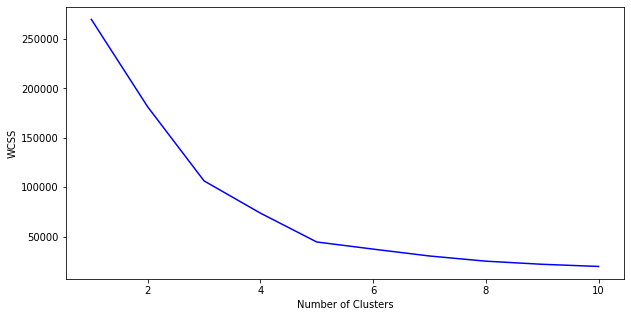

In [118]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11),wcss,color='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [119]:
# K = 5 is optimal
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_pred=kmeans.fit_predict(X)

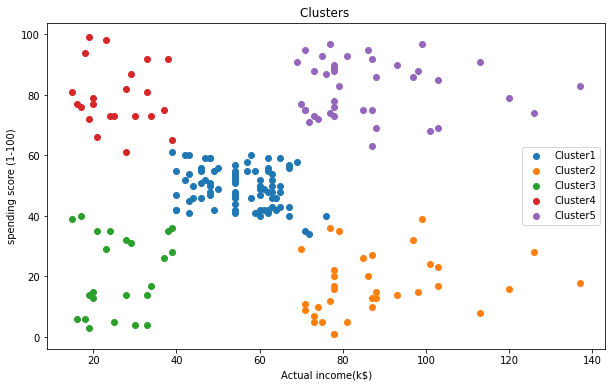

In [142]:
plt.figure(figsize=(10,6))

for i in range(5):
    plt.scatter(X[y_pred==i,0],X[y_pred==i,1],label='Cluster'+str(i+1))
    plt.legend() ## puts labels 
    

plt.title('Clusters ')
plt.xlabel('Actual income(k$)')
plt.ylabel('spending score (1-100)')
plt.show()